In [1]:
import h5py
import numpy as np
import time
import matplotlib.pyplot as plt

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
! ls -l /cluster/home/mtuncel/sc-pipe/hdf5_data/

total 181572
-rw-rw---- 1 mtuncel mtuncel-group   7863536 Feb 22 19:58 hgmm100.h5
-rw-rw---- 1 mtuncel mtuncel-group       542 Mar 21 21:52 melanomaS2_estimated.rda
-rw-rw---- 1 mtuncel mtuncel-group 177321089 Mar 21 21:43 raw_melanomaS2.h5


In [3]:
input_file = '/cluster/home/mtuncel/sc-pipe/hdf5_data/raw_melanomaS2.h5'

In [4]:
h5f = h5py.File(input_file, 'r')

In [5]:
list(h5f['gene_attrs'].keys())

['gene_ids', 'gene_names']

In [6]:
matrix = h5f['matrix'][:]
barcodes = h5f['cell_attrs']['cell_names'].value


In [7]:
matrix.shape

(2216, 19928)

In [8]:
h5f.close()
#matrix = np.log1p(matrix)

<img src="data/dirichlet_plot.png">

In [51]:
c_size = 15
res = None
while True:
    dirr = np.random.dirichlet(np.ones(c_size)*10, size=1)
    if np.sum(dirr)==1:
        res = dirr.flatten()
        break
    else:
        continue

In [52]:
np.sum(res)

1.0

In [53]:
res

array([0.07138748, 0.06669288, 0.08531844, 0.04363855, 0.06625463,
       0.09806214, 0.05405509, 0.0725517 , 0.08826865, 0.04676826,
       0.04470412, 0.06122559, 0.06798914, 0.08736732, 0.04571601])

In [15]:
rounder = np.vectorize(lambda t: round(t,2))
v_res = rounder(res)

In [16]:
sum(v_res)

1.0100000000000002

In [59]:
total = sum(v_res)
if total < 1.0:
    diff = 1.0 - total
    v_res[np.argmin(v_res)] += diff
elif total > 1.0:
    diff = total - 1.0
    v_res[np.argmax(v_res)] -= diff

In [60]:
sum(v_res)

1.0

In [48]:
type(v_res)

numpy.ndarray

In [51]:
v_res[4]

0.07

In [24]:
res.

array([0.0751598 , 0.09971722, 0.09641525, 0.08122043, 0.19430599,
       0.09927244, 0.14337783, 0.09002097, 0.12051008])

In [92]:
def dirichlet_group_prob(size):
    while True:
        dirr = np.random.dirichlet(np.ones(size)*10, size=1)
        if np.sum(dirr)==1:
            dist = dirr.flatten()
            break
        else:
            continue
    #import ipdb; ipdb.set_trace()
    rounder = np.vectorize(lambda t: round(t,2))
    v_res = rounder(dist)
    total = np.sum(v_res)
    if total < 1.0:
        diff = 1.0 - total
        v_res[np.argmin(v_res)] += diff
    elif total > 1.0:
        diff = total - 1.0
        v_res[np.argmax(v_res)] -= diff
    
    return v_res.tolist()

In [93]:
dirichlet_group_prob(9)

[0.1, 0.15, 0.1, 0.08, 0.19, 0.12, 0.06000000000000001, 0.07, 0.13]

In [78]:
s = dirichlet_group_prob(9)

In [82]:
s

[0.09000000000000001, 0.1, 0.08, 0.13, 0.14, 0.11, 0.09, 0.13, 0.13]

In [81]:
sum(s)

1.0

In [137]:
c_size = 9

In [138]:
def plot_dist(alpha):
    dirr = np.random.dirichlet(np.ones(c_size)*alpha, size=500)
    plt.figure(figsize=(14, 7))
    plt.hist(dirr, color=None)
    title = "alpha =" + str(alpha)
    plt.title(title)
    fig = plt.gcf()

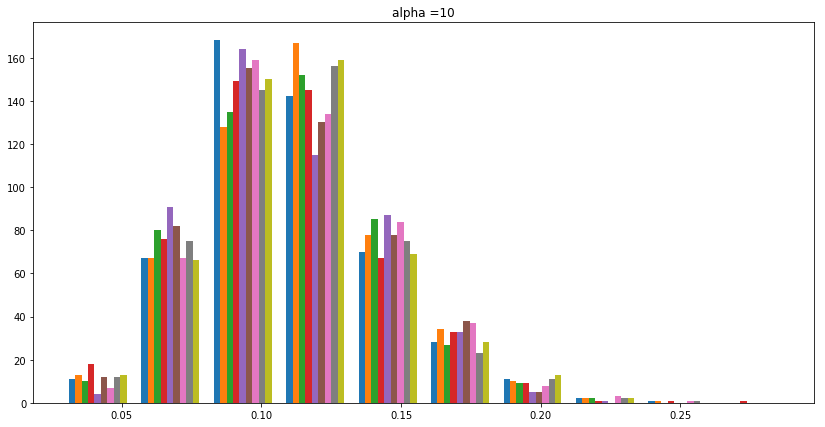

In [139]:
plot_dist(10)

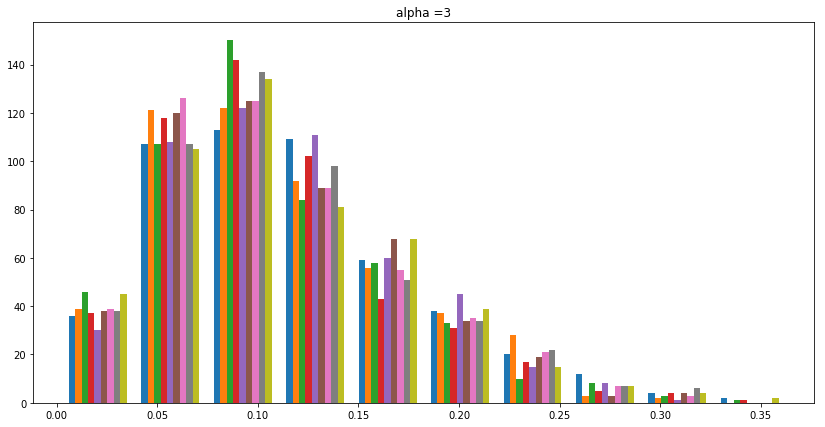

In [130]:
plot_dist(3)

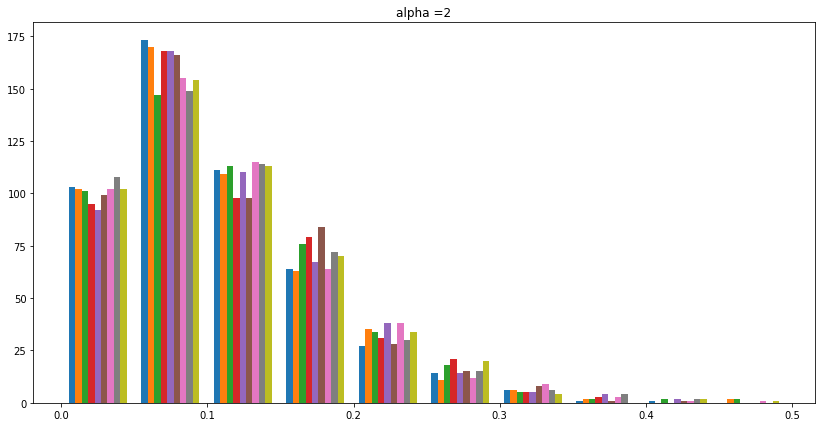

In [129]:
plot_dist(2)

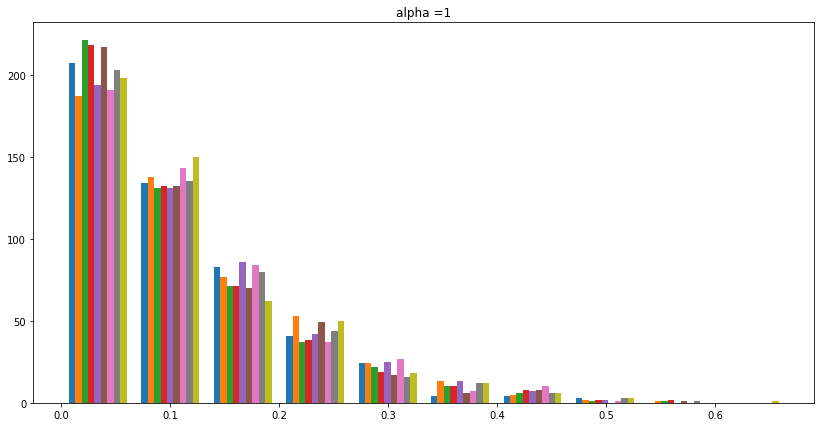

In [123]:
plot_dist(1)

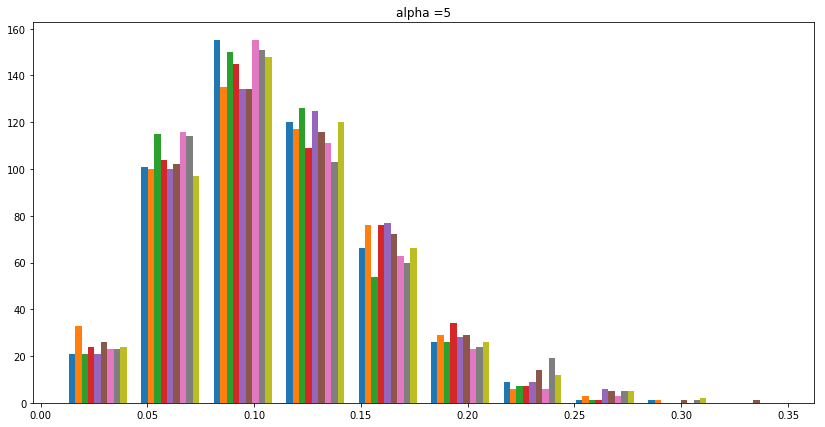

In [124]:
plot_dist(5)

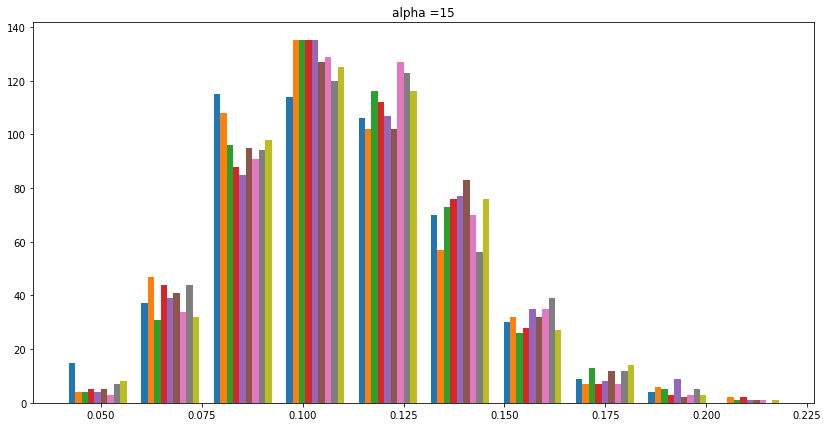

In [125]:
plot_dist(15)

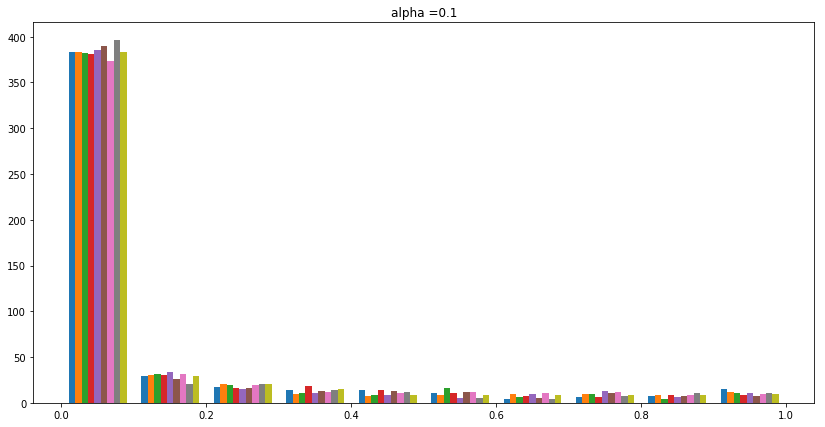

In [126]:
plot_dist(0.1)

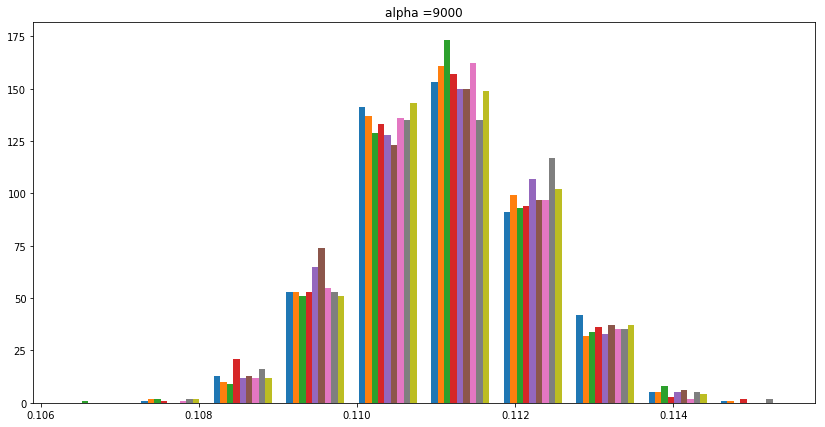

In [127]:
plot_dist(9000)